Author: Ryan Corbyn 

Date: 09/12/2020

Edits:


Description:
This is a script that plots the results of the data analysis for the thermometry experiments. 
It reads the data from a text file, plots the data with its errorbars and then fits a linear fit to the graph. 
These graphs are then saved to the iDrive. 


In [2]:
import numpy as np 
import scipy.optimize as opt 
import os 
import pandas as pd
import matplotlib.pyplot as plot 

In [3]:
def load_data(file_location):
    # load the data into a pandas array.
    data = pd.read_table(file_location)
    
    return(data)

In [23]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [21]:
def plot_temps(temp, res_freq, error):
    # plot the data in an errorbar
    
    fig1, ax1 = plot.subplots()
    ax1.set_xlabel('Temperture (oC)')
    ax1.set_ylabel('Resonant Frequency (GHz)')
    ax1 = plot.errorbar(temp, res_freq, error, marker = 'x',
                              linestyle = '', color = 'k',
                       label = 'Experimental data')

    return(fig1, ax1)

In [31]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [33]:
def get_RMS_error(y_data, y_fit):
    # Calculate the RMS error for the fitting vs the actual ODMR data (y_data). 
    
    rms_error = np.sqrt(np.sum(np.power(y_data-y_fit,2))/len(y_data))
    rms_error = rms_error/np.mean(y_fit)

    return(rms_error)

In [14]:
def straight_line(x, M, C):
    # M = gradient, C = Y intercept
    # create a linear fit. 
    y = M*x + C
    return(y)

In [67]:
def save_data(folder_location, nd, m1, delta_m1, m2, delta_m2, c1, delta_c1, 
             c2, delta_c2, r_squared_1, rms_error_1, r_squared_2, rms_error_2, 
             fig1, fig2):
    # Save data fitting stuff in a text file and 
    # save the plots to a folder.
    
    folder_location = folder_location + 'Analysis\\'
    output_data_file = folder_location + date + '_Thermometry_analysis.dat'
    
    # Checking to see if the folder exists in which to save the data, and creating it if it does not
    if not os.path.exists(folder_location):
        os.makedirs(folder_location)
        # Checking the output file exists and creating and initialising it if not
    
    if os.path.isfile(output_data_file) == False:
        with open(output_data_file, "w") as wf:
            wf.write('ND' + '\t' + 'Low freq Gradient (GHz\K)' + '\t' +
                     'Low freq Gradient Error (GHz\K)' + '\t' + 'Low freq Intercept (GHz)' + '\t' +
                     'Low freq Intercept Error (GHz)' + '\t' + 'Low freq R_Squared' + '\t' + 
                     'Low freq RMS Error' + '\t'+
                     'High freq Gradient (GHz\K)' + '\t' + 'High freq Gradient Error (GHz\K)' + '\t' + 
                     'High freq Intercept (GHz)' + '\t' + 'High freq Intercept Error (GHz)' +'\t' + 
                     'High freq R_Squared' + '\t' + 'High freq RMS Error' + '\n')
        
    with open(output_data_file, 'a') as wf:
        wf.write(str(nd) + '\t' + str(m1) + '\t' + str(delta_m1) + '\t' +
                 str(c1) + '\t' + str(delta_c1) + '\t' + 
                 str(r_squared_1) + '\t' + str(rms_error_1) + '\t' +
                 str(m2) + '\t' + str(delta_m2) + '\t' +
                 str(c2) + '\t' + str(delta_c2) + '\t' +
                 str(r_squared_2) + '\t' + str(rms_error_2) + '\n')
        
    fig1.savefig(folder_location + date + '_ND' +str(nd) +'_low_res_freq_vs_temp'  +'.png')
    fig2.savefig(folder_location + date + '_ND' +str(nd) +'_high_res_freq_vs_temp'  +'.png')


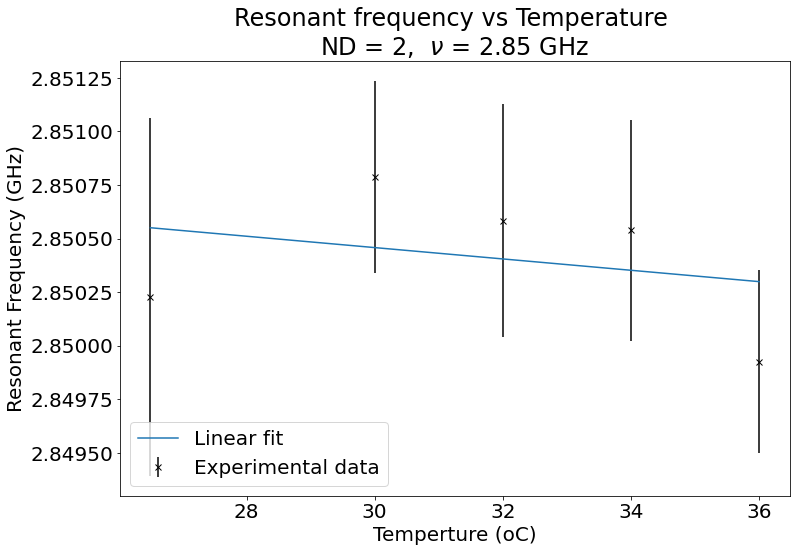

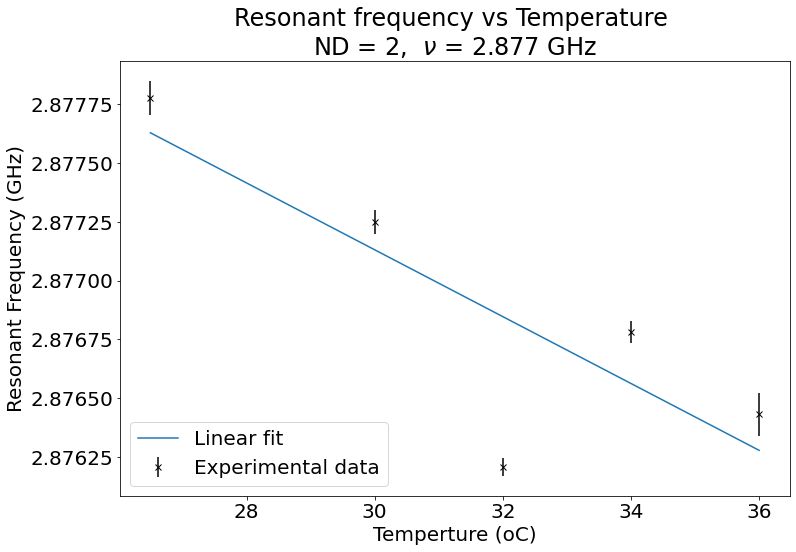

In [69]:
# Get the data file location and name. 
folder_location = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\Thermometry\\20201123\\Trimmed_data\\'
date = '20201123'
file_name = '20201123_Thermometry_analysis_ND2'

# Get the data from the text file. 
data_frame = load_data(folder_location + file_name + '.txt.')
# Get vairables 
nd = data_frame['ND'][0] # Nanodiamond number
temp = data_frame['Temp (oC)'] # Temperature array
low_freq = data_frame.iloc[:,2] # lower frequnency Resonance 
low_freq_error = data_frame.iloc[:,3] # lower frequency resonance error

high_freq = data_frame.iloc[:,4] # higher frequency resonance
high_freq_error = data_frame.iloc[:,5] # high frequency error 

set_plot_params() # change the plot sizes. 

fig1, ax1 = plot_temps(temp, low_freq, low_freq_error) # errorbar plots 
P0 = [1,1] # Initial fit params
# Get the linear fit parameters.
linear_fit_coeffs1, linear_fit_confidence1 = opt.curve_fit(straight_line, temp, low_freq, P0)
error_1 = np.sqrt(np.diag(linear_fit_confidence1)) # fitting error
# Generate a y fit. 
y_fit = straight_line(temp, linear_fit_coeffs1[0], linear_fit_coeffs1[1])
plot.plot(temp, y_fit, label = 'Linear fit') # plot linear fit
plot.legend(loc='lower left') # generate legend
# Generate plot title
plot.title('Resonant frequency vs Temperature \nND = ' + str(nd) 
         + ',\t' + r' $\nu$ = ' + str(np.round(np.mean(low_freq), 3)) + ' GHz')
r_squared_1 = get_r_squared(temp, low_freq, y_fit) # Judge fitting
rms_error_1 = get_RMS_error(low_freq, y_fit) # RMS error. 


fig2, ax2 = plot_temps(temp, high_freq, high_freq_error) # errorbar plots
# Get the linear fit parameters.
linear_fit_coeffs2, linear_fit_confidence2 = opt.curve_fit(straight_line, temp, high_freq, P0)
error_2 = np.sqrt(np.diag(linear_fit_confidence2)) # fitting error
# Generate a y fit.
y_fit = straight_line(temp, linear_fit_coeffs2[0], linear_fit_coeffs2[1])
plot.plot(temp, y_fit, label = 'Linear fit') # plot linear fit
plot.legend(loc='lower left') # generate legend
# Generate plot title
plot.title('Resonant frequency vs Temperature \nND = ' + str(nd) 
         + ',\t' + r' $\nu$ = ' + str(np.round(np.mean(high_freq), 3)) + ' GHz')
r_squared_2 = get_r_squared(temp, low_freq, y_fit) # Judge fitting
rms_error_2 = get_RMS_error(low_freq, y_fit) # RMS error.

save_data(folder_location, nd, linear_fit_coeffs1[0], error_1[0], linear_fit_coeffs2[0], error_2[0], 
          linear_fit_coeffs1[1], error_1[1], linear_fit_coeffs2[1], error_2[1], 
          r_squared_1, rms_error_1, r_squared_2, rms_error_2, 
             fig1, fig2)

In [64]:
print(error_1)

[2.08063429e-05 6.63084184e-04]


In [65]:
print(error_2)

[3.13492637e-05 9.99078131e-04]
